In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [ ]:
# import the data
togodf = pd.read_csv('../../data/togo_clean.csv',  parse_dates=["Timestamp"])
sierraleonedf = pd.read_csv('../../data/sierraleone_clean.csv',  parse_dates=["Timestamp"])
benindf = pd.read_csv('../../data/benin_clean.csv',  parse_dates=["Timestamp"])

In [5]:
togodf.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModA,TModB,Comments,Z_GHI,Z_DNI,Z_DHI,Z_ModA,Z_ModB,Z_WS,Z_WSgust
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,24.7,24.4,NaN,-0.718859,-0.602727,-0.743956,-0.71261,-0.713042,-1.003710,-1.131165
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,24.7,24.4,NaN,-0.718859,-0.602727,-0.743956,-0.71261,-0.713042,-0.866974,-0.865570
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,24.7,24.4,NaN,-0.718859,-0.602727,-0.743956,-0.71261,-0.713042,-0.798606,-0.971808
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,24.7,24.4,NaN,-0.718549,-0.602727,-0.743956,-0.71261,-0.713042,-0.798606,-0.865570
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,24.7,24.4,NaN,-0.718549,-0.602727,-0.743956,-0.71261,-0.713042,-0.730237,-0.865570


In [6]:
sierraleonedf.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModA,TModB,Comments,Z_GHI,Z_DNI,Z_DHI,Z_ModA,Z_ModB,Z_WS,Z_WSgust
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532701,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532701,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532701,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532243,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,...,22.3,22.6,NaN,-0.678931,-0.532701,-0.7205,-0.686758,-0.685782,-0.924846,-1.046105


In [7]:
benindf.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModA,TModB,Comments,Z_GHI,Z_DNI,Z_DHI,Z_ModA,Z_ModB,Z_WS,Z_WSgust
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,26.3,26.2,NaN,-0.730102,-0.639591,-0.733873,-0.723749,-0.723088,-1.322831,-1.187312
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,26.3,26.2,NaN,-0.729800,-0.639591,-0.733873,-0.723749,-0.723088,-1.322831,-1.384442
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,26.4,26.2,NaN,-0.729800,-0.639591,-0.733873,-0.723749,-0.723088,-1.135736,-0.842334
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,26.4,26.3,NaN,-0.729800,-0.639209,-0.733243,-0.723749,-0.723088,-1.198101,-1.039464
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,26.4,26.3,NaN,-0.729498,-0.639209,-0.733243,-0.723749,-0.723088,-1.260466,-1.039464


C:\Users\Abdilfatah\AppData\Local\Temp\ipykernel_14472\1950297393.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=df_combined, palette="Set2")
C:\Users\Abdilfatah\AppData\Local\Temp\ipykernel_14472\1950297393.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=df_combined, palette="Set2")
C:\Users\Abdilfatah\AppData\Local\Temp\ipykernel_14472\1950297393.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=df_combined, palette="Set2")


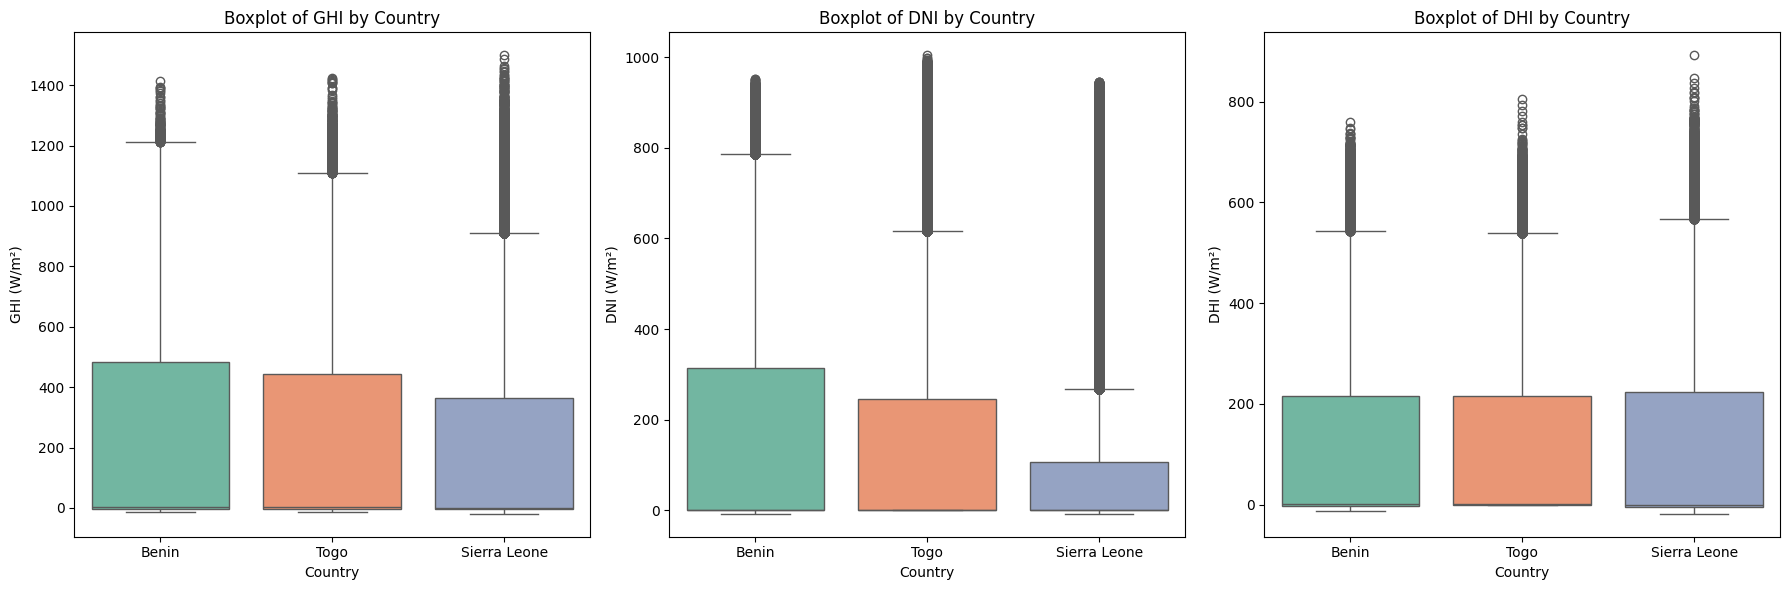

In [8]:
# Combine datasets for comparison
benindf["Country"] = "Benin"
togodf["Country"] = "Togo"
sierraleonedf["Country"] = "Sierra Leone"

# Concatenating the DataFrames into a single dataset
df_combined = pd.concat([benindf, togodf, sierraleonedf], ignore_index=True)

# Define metrics to compare
metrics = ["GHI", "DNI", "DHI"]

# Create boxplots for each metric
plt.figure(figsize=(18, 6))

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Country", y=metric, data=df_combined, palette="Set2")
    plt.title(f"Boxplot of {metric} by Country")
    plt.xlabel("Country")
    plt.ylabel(f"{metric} (W/m²)")

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [9]:
countries = {
    "Benin": benindf,
    "Togo": togodf,
    "Sierra Leone": sierraleonedf
}

# Initialize an empty list to store summary stats
summary_data = []

# Calculate statistics for each country
for country, df in countries.items():
    stats = {
        "Country": country,
        "GHI Mean": df["GHI"].mean(),
        "GHI Median": df["GHI"].median(),
        "GHI Std": df["GHI"].std(),
        "DNI Mean": df["DNI"].mean(),
        "DNI Median": df["DNI"].median(),
        "DNI Std": df["DNI"].std(),
        "DHI Mean": df["DHI"].mean(),
        "DHI Median": df["DHI"].median(),
        "DHI Std": df["DHI"].std(),
    }
    summary_data.append(stats)

# Convert list to DataFrame for easy viewing
summary_df = pd.DataFrame(summary_data)

# Display summary table
print(summary_df)

# Optional: Save summary table as CSV
summary_df.to_csv("summary_statistics.csv", index=False)

        Country    GHI Mean  GHI Median     GHI Std    DNI Mean  DNI Median  \
0         Benin  240.559452         1.8  331.131327  167.187516        -0.1   
1          Togo  230.555040         2.1  322.532347  151.258469         0.0   
2  Sierra Leone  201.957515         0.3  298.495150  116.376337        -0.1   

      DNI Std    DHI Mean  DHI Median     DHI Std  
0  261.710501  115.358961         1.6  158.691074  
1  250.956962  116.444352         2.5  156.520714  
2  218.652659  113.720571        -0.1  158.946032  


In [12]:
# Assuming GHI values are stored in DataFrames
ghi_benin = benindf["GHI"].dropna()
ghi_togo = togodf["GHI"].dropna()
ghi_sierra_leone = sierraleonedf["GHI"].dropna()

# **One-Way ANOVA Test**
anova_result = stats.f_oneway(ghi_benin, ghi_togo, ghi_sierra_leone)
print("\nANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.4f}, p-value: {anova_result.pvalue:.4f}")

# **Kruskal-Wallis Test** (Non-parametric alternative)
kruskal_result = stats.kruskal(ghi_benin, ghi_togo, ghi_sierra_leone)
print("\nKruskal-Wallis Test Results:")
print(f"H-statistic: {kruskal_result.statistic:.4f}, p-value: {kruskal_result.pvalue:.4f}")

# Interpretation:
if anova_result.pvalue < 0.05:
    print("\nANOVA: Significant difference in GHI values across countries (p < 0.05).")
else:
    print("\nANOVA: No significant difference detected (p ≥ 0.05).")

if kruskal_result.pvalue < 0.05:
    print("\nKruskal-Wallis: Significant difference in GHI values across countries (p < 0.05).")
else:
    print("\nKruskal-Wallis: No significant difference detected (p ≥ 0.05).")


ANOVA Test Results:
F-statistic: 2090.0929, p-value: 0.0000

Kruskal-Wallis Test Results:
H-statistic: 4524.8835, p-value: 0.0000

ANOVA: Significant difference in GHI values across countries (p < 0.05).

Kruskal-Wallis: Significant difference in GHI values across countries (p < 0.05).


### Key Observations
- **Benin shows the highest median GHI** but also exhibits the greatest variability, indicating strong solar potential but requiring stability assessments for long-term investments.
- **Togo has relatively consistent DNI values** with lower variability, suggesting reliable solar radiation levels suitable for stable energy harvesting.
- **Sierra Leone demonstrates lower overall solar irradiance** but maintains steady temperature trends, which may influence solar panel efficiency and cooling requirements.


C:\Users\Abdilfatah\AppData\Local\Temp\ipykernel_14472\2617784027.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Country", y="Average GHI", data=df_summary, palette="Blues_r")


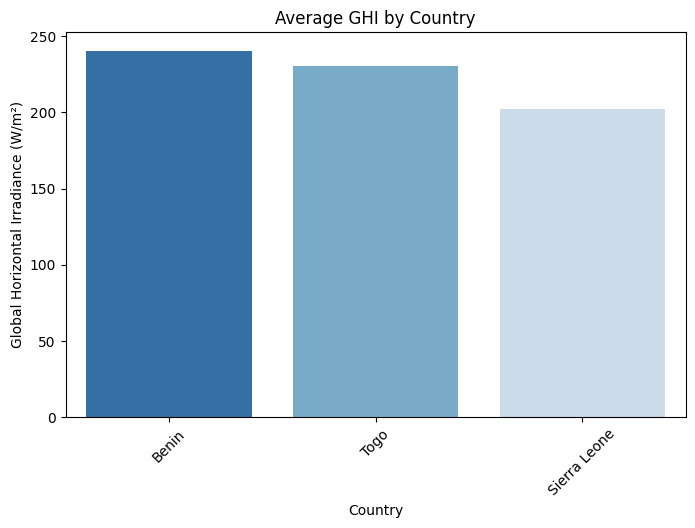

In [13]:
countries = {
    "Benin": benindf["GHI"].mean(),
    "Togo": togodf["GHI"].mean(),
    "Sierra Leone": sierraleonedf["GHI"].mean(),
}

# Convert dictionary to DataFrame for visualization
df_summary = pd.DataFrame(list(countries.items()), columns=["Country", "Average GHI"])

# Create bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x="Country", y="Average GHI", data=df_summary, palette="Blues_r")
plt.title("Average GHI by Country")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()